## 1. Data Import from kaggle
We are going to use a dataset available from kaggle:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [9]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Understanding the raw data

In [10]:
data = pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3. Data preprocessing 
ensures that the dataset is clean, balanced, and appropriately formatted for model training. By addressing missing values, outliers, and class imbalance, and by standardizing features, the data preprocessing step sets the foundation for accurate and reliable credit card fraud detection models.


Some things that I can consider:

-Handling Missing Values: Examine the dataset to identify and handle missing values in any of the features. You can use techniques like imputation or removal based on the extent of missing data.

-Outlier Detection and Treatment: Identify outliers in features like "Amount" and "V1" through "V28." Decide whether to remove or transform these outliers based on their impact.

-Class Imbalance Handling: Analyze the distribution of the "Class" labels. If there's a class imbalance, consider implementing techniques like oversampling or undersampling to address it.

-Feature Scaling and Normalization: Apply appropriate scaling techniques to the numerical features "Amount" and "V1" through "V28."

-Encoding Categorical Variables: If there are any categorical variables, ensure they are encoded in a suitable format for model training.

-Handling Time-Based Features: Utilize the "Time" feature to extract relevant time-based information such as day of the week or hour of the day.

-Feature Selection: Analyze the significance of each feature in relation to credit card fraud detection. Consider removing or transforming features that may not contribute significantly.

-Data Splitting: Split the dataset into training and validation sets to prepare for model training and evaluation.

In [13]:
# Checking percent of missing values in columns
df_missing_columns = (round(((data.isnull().sum() / len(data.index)) * 100), 2).to_frame('null')).sort_values('null', ascending=False)
# Display the DataFrame showing missing value percentages
print(df_missing_columns)


        null
Time     0.0
V16      0.0
Amount   0.0
V28      0.0
V27      0.0
V26      0.0
V25      0.0
V24      0.0
V23      0.0
V22      0.0
V21      0.0
V20      0.0
V19      0.0
V18      0.0
V17      0.0
V15      0.0
V1       0.0
V14      0.0
V13      0.0
V12      0.0
V11      0.0
V10      0.0
V9       0.0
V8       0.0
V7       0.0
V6       0.0
V5       0.0
V4       0.0
V3       0.0
V2       0.0
Class    0.0


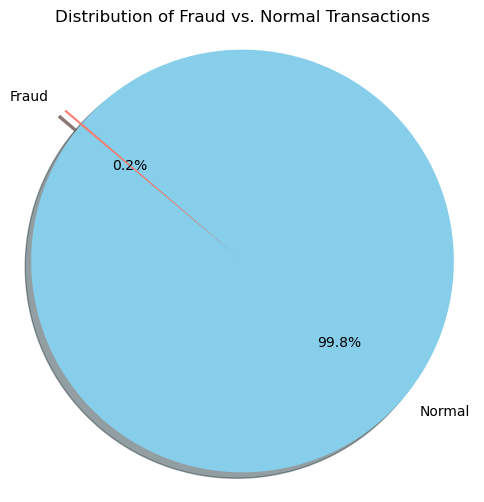

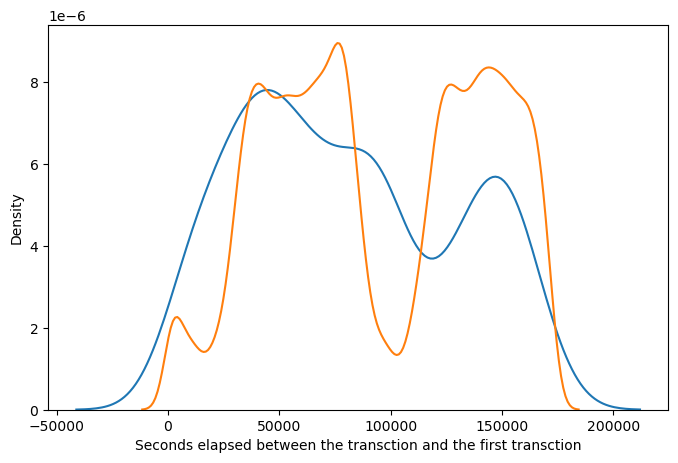

In [31]:
# Calculate the percentage of each class
classes = data['Class'].value_counts()
normal_share = round((classes[0] / data['Class'].count() * 100), 2)
fraud_share = round((classes[1] / data['Class'].count() * 100), 2)

# Create a pie chart
labels = ['Normal', 'Fraud']
sizes = [normal_share, fraud_share]
colors = ['skyblue', 'salmon']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Fraud vs. Normal Transactions')
plt.show()

# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()


In [ ]:
#test
